In [1]:
PATH_YIELD_ENGINE = 'src'

def set_paths() -> None:
    """
    set correct working directory and python path when started from within PyCharm
    """
    import sys
    import os
    
    if 'cwd' not in globals():
        # noinspection PyGlobalUndefined
        global cwd
        cwd = os.path.join(os.getcwd(), os.pardir)
        os.chdir(cwd)
    
    print(f"working dir is '{os.getcwd()}'")
                             
    if PATH_YIELD_ENGINE not in sys.path:
        sys.path.insert(0, PATH_YIELD_ENGINE)
    
    print(f"added `{sys.path[0]}` to python paths")

set_paths()

working dir is 'C:\Users\martin florent\Documents\projects\yield-engine'
added `src` to python paths


In [2]:
from sklearn import datasets
import pandas as pd

from gamma import Sample
from gamma.sklearndf.regression import RandomForestRegressorDF, LGBMRegressorDF
from gamma.sklearndf.transformation import SimpleImputerDF, OneHotEncoderDF
from gamma.model.inspection import ModelInspector
from gamma.model.prediction import RegressorFitCV, PredictorFitCV
from gamma.model.selection import ModelGrid, ModelPipelineDF, ModelRanker
from gamma.model.validation import CircularCrossValidator
from gamma.sklearndf.pipeline import PipelineDF 
from gamma.sklearndf.transformation import ColumnTransformerDF, FunctionTransformerDF
from gamma.sklearndf.transformation.extra import BorutaDF, OutlierRemoverDF
from gamma.viz import dendrogram
from gamma.yieldengine.partition import ContinuousRangePartitioning, CategoryPartitioning
from gamma.yieldengine.simulation import UnivariateSimulator
from gamma.yieldengine.viz import SimulationDrawer, SimulationPlotStyle, SimulationReportStyle

In [3]:
boston = datasets.load_boston()

df = pd.DataFrame(data=boston.data, columns=boston.feature_names).astype({'RAD':'str'}).astype({'RAD':'category'})

numerical_features = df.columns.drop('RAD')
categorical_features = ['RAD']

df['price'] = boston.target

In [4]:
sample = Sample(observations=df, target_name='price')

In [5]:
preprocessing = ColumnTransformerDF(transformers=[
 ('num', SimpleImputerDF(), numerical_features),
    ('cat', SimpleImputerDF(strategy='constant', fill_value='nan'), categorical_features)
]                               )

In [6]:
model=ModelPipelineDF(predictor=RandomForestRegressorDF(n_estimators=10), preprocessing=preprocessing)

In [7]:
cv = CircularCrossValidator()

predictor = RegressorFitCV(model=model, cv=cv, sample=sample)

simulator =UnivariateSimulator(model_fit=predictor)

# sklearn and  numerical partitioning

In [8]:
partitioning = ContinuousRangePartitioning(df['AGE'])

simulation = simulator.simulate_feature(feature_name='AGE', partitioning=partitioning)

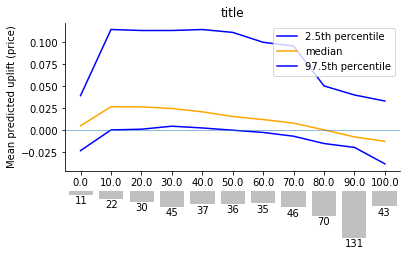

In [9]:
SimulationDrawer(
    title='title',
    simulation=simulation,
    style=SimulationPlotStyle()
).draw()

In [10]:
try:
    ContinuousRangePartitioning(df['RAD'])
except TypeError as te:
    print(te)

Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one



# sklearn and categorical partitioning

In [11]:
partitioning_cat = CategoryPartitioning(df['RAD'])

simulation_cat = simulator.simulate_feature(feature_name='RAD', partitioning=partitioning_cat)

been here
been here


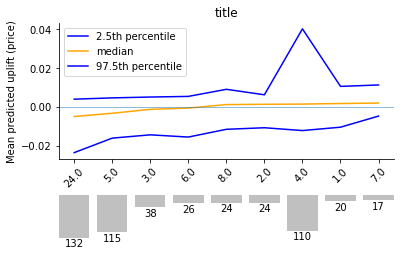

In [12]:
SimulationDrawer(
    title='title',
    simulation=simulation_cat,
    style=SimulationPlotStyle()
).draw()

# LGBM model

In [13]:
boston = datasets.load_boston()

df = pd.DataFrame(data=boston.data, columns=boston.feature_names).astype({'RAD':'str'}).astype({'RAD':'category'})

numerical_features = df.columns.drop('RAD')
categorical_features = ['RAD']

df['price'] = boston.target

In [14]:
sample = Sample(observations=df, target_name='price')

In [15]:
model_lgbm = ModelPipelineDF(predictor=LGBMRegressorDF(n_estimators=10), preprocessing=None)

In [16]:
cv = CircularCrossValidator()

predictor_lgbm = RegressorFitCV(model=model_lgbm, cv=cv, sample=sample)

simulator_lgbm =UnivariateSimulator(model_fit=predictor_lgbm)

# lgbm and continuous partitioning

In [17]:
partitioning = ContinuousRangePartitioning(df['AGE'])

simulation_lgbm = simulator_lgbm.simulate_feature(feature_name='AGE', partitioning=partitioning)

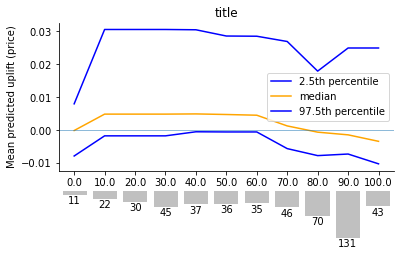

In [18]:
SimulationDrawer(
    title='title',
    simulation=simulation_lgbm,
    style=SimulationPlotStyle()
).draw()

# lgbm and categorical partitioning

In [19]:
partitioning_cat = CategoryPartitioning(df['RAD'])

simulation_cat = simulator_lgbm.simulate_feature(feature_name='RAD', partitioning=partitioning_cat)

been here
been here


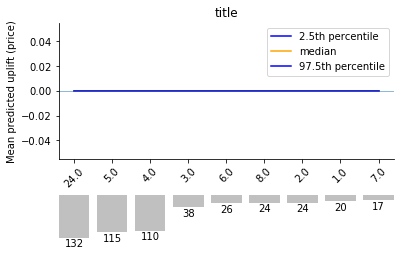

In [20]:
SimulationDrawer(
    title='title',
    simulation=simulation_cat,
    style=SimulationPlotStyle()
).draw()

In [21]:
simulation_cat.median_uplift

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])